In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
%matplotlib inline

**Adding Data**

In [2]:
gdf = gpd.read_file('/home/adrymr/Documents/projects/geospatial-analysis-west-java/data/pulau_jawa_kab.shp')

**Reading Data**

In [3]:
gdf.shape, gdf.geom_type

((122, 8),
 0           Polygon
 1      MultiPolygon
 2      MultiPolygon
 3           Polygon
 4           Polygon
            ...     
 117         Polygon
 118    MultiPolygon
 119    MultiPolygon
 120    MultiPolygon
 121         Polygon
 Length: 122, dtype: object)

In [4]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [5]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

In [6]:
gdf.head(10)

,NEGARA,date,validOn,PROVINSI,KABUPATEN,PRV2,LUAS,geometry
0,Indonesia,2019-12-20,2020-04-01,Jawa Timur,Bangkalan,Jawa_Timur,1303.318897,"POLYGON ((113.03600 -6.87967, 113.03668 -6.879..."
1,Indonesia,2019-12-20,2020-04-01,Jawa Timur,Banyuwangi,Jawa_Timur,3603.001914,"MULTIPOLYGON (((114.20384 -8.65725, 114.20366 ..."
2,Indonesia,2019-12-20,2020-04-01,Jawa Timur,Blitar,Jawa_Timur,1754.036118,"MULTIPOLYGON (((112.23872 -8.35230, 112.23880 ..."
3,Indonesia,2019-12-20,2020-04-01,Jawa Timur,Bojonegoro,Jawa_Timur,2313.908826,"POLYGON ((111.63838 -6.99566, 111.63868 -6.995..."
4,Indonesia,2019-12-20,2020-04-01,Jawa Timur,Bondowoso,Jawa_Timur,1555.440576,"POLYGON ((114.01140 -7.76254, 114.01194 -7.762..."
5,Indonesia,2019-12-20,2020-04-01,Jawa Timur,Gresik,Jawa_Timur,1252.844246,"MULTIPOLYGON (((112.55104 -6.84673, 112.55359 ..."
6,Indonesia,2019-12-20,2020-04-01,Jawa Timur,Jember,Jawa_Timur,3306.435502,"MULTIPOLYGON (((113.81802 -8.56293, 113.81799 ..."
7,Indonesia,2019-12-20,2020-04-01,Jawa Timur,Jombang,Jawa_Timur,1120.517775,"POLYGON ((112.33495 -7.34572, 112.33499 -7.345..."
8,Indonesia,2019-12-20,2020-04-01,Jawa Timur,Kediri,Jawa_Timur,1522.985358,"POLYGON ((112.12161 -7.60675, 112.12184 -7.606..."
9,Indonesia,2019-12-20,2020-04-01,Jawa Timur,Kota Batu,Jawa_Timur,196.317394,"POLYGON ((112.53523 -7.72512, 112.53550 -7.725..."


**Initial Visualization**

<Axes: >

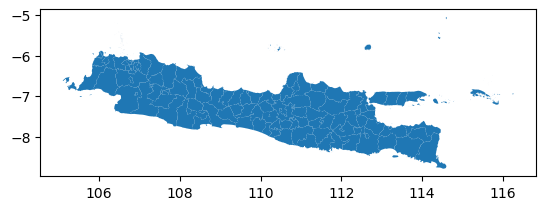

In [7]:
gdf.plot()

**Provinces Visualization**

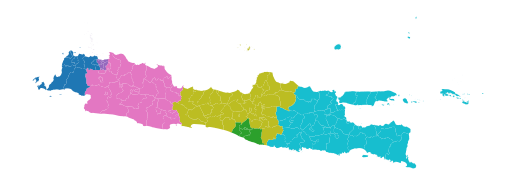

In [8]:
ax=gdf.plot('PROVINSI')
ax.set_axis_off()

**Adding Legend**

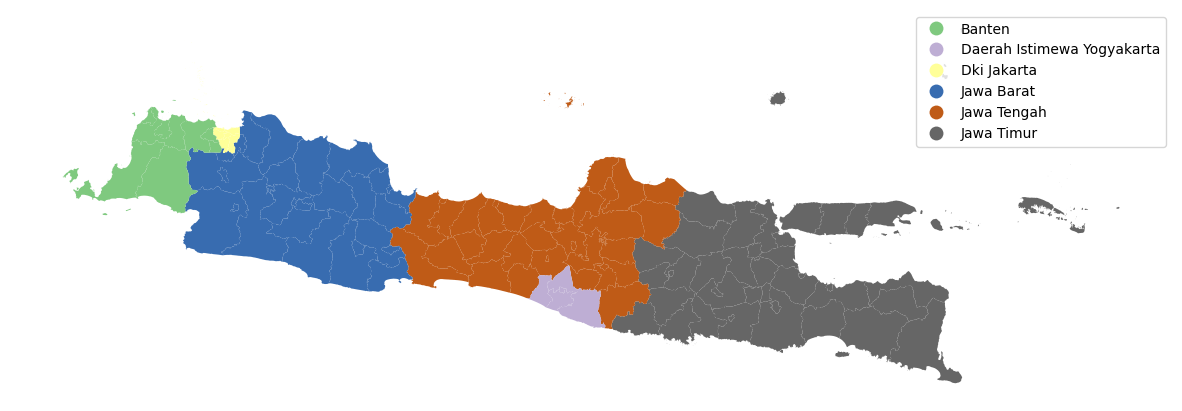

In [9]:
ax=gdf.plot('PROVINSI',cmap='Accent',figsize=(15,15),legend=True)
ax.set_axis_off()

**West Java Visualization**

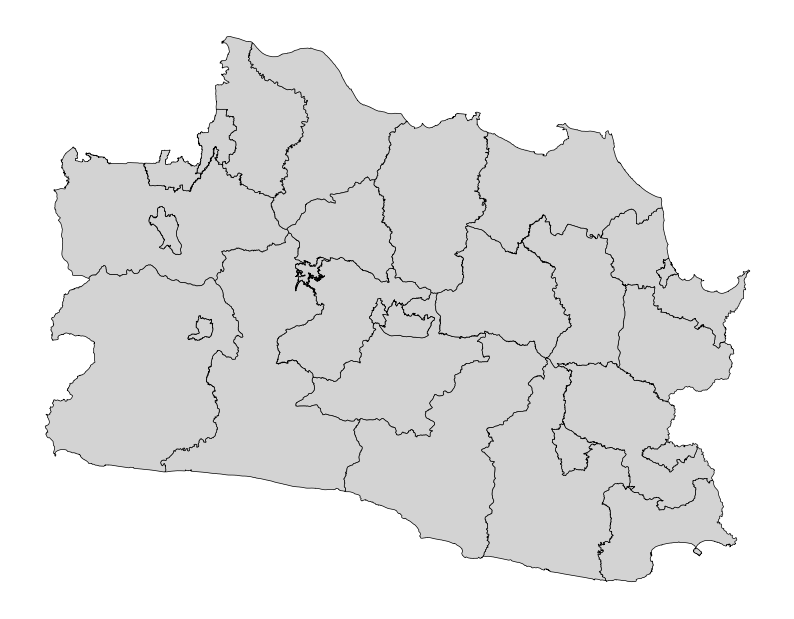

In [10]:
jabar = gdf[gdf['PROVINSI']=='Jawa Barat']
ax=jabar.plot(figsize=(10,10), color='lightgrey', edgecolor='black', linewidth=0.5)
ax.set_axis_off()

**Highlighting and Saving Visualization of Bogor City**

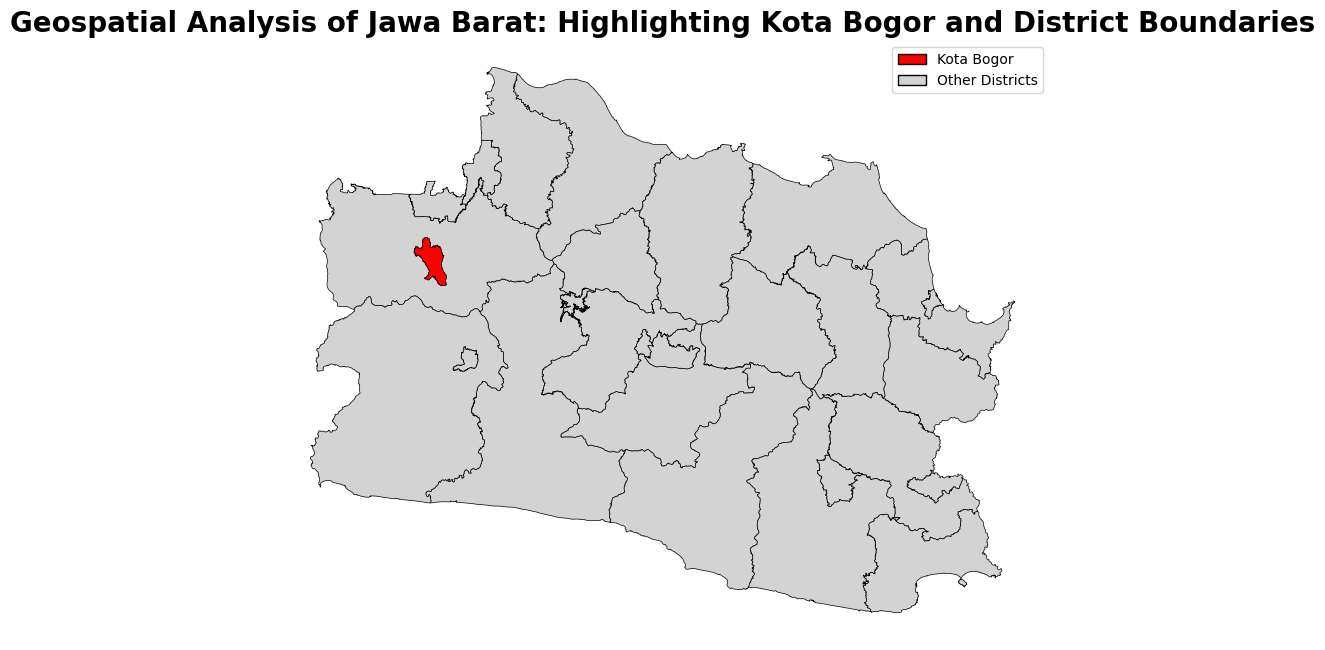

In [11]:
jabar = gdf[gdf['PROVINSI'] == 'Jawa Barat']
colors = ['red' if kab == 'Kota Bogor' else 'lightgrey' for kab in jabar['KABUPATEN']]

fig, ax = plt.subplots(figsize=(10, 10))
jabar.plot(ax=ax, color=colors, edgecolor='black', linewidth=0.5)

ax.set_axis_off()

plt.title('Geospatial Analysis of Jawa Barat: Highlighting Kota Bogor and District Boundaries', 
          fontdict={'fontsize': 20, 'fontweight': 'bold', 'family': 'sans-serif'})

legend_elements = [Patch(facecolor='red', edgecolor='black', label='Kota Bogor'),
                   Patch(facecolor='lightgrey', edgecolor='black', label='Other Districts')]

ax.legend(handles=legend_elements, loc='upper right')

# Save the figure to the 'outputs' folder
plt.savefig('/home/adrymr/Documents/projects/geospatial-analysis-west-java/bogor_west_java.png', bbox_inches='tight', dpi=300)

plt.show()